# More probability theory

Introduction to be written later... Beware that this is a first draft of the chapter. To do:

1. Rewrite section on moment generating functions.

## Expectations and joint distributions

To motivate the considerations in this section, suppose that we have two random variables $X$ and $Y$ defined on a probability space $S$ and a real-valued function $g:\bbr^2 \to \bbr$. We may then "transform" the random variables to obtain the random variable

$$
g(X,Y): S \xrightarrow{(X,Y)} \bbr^2 \xrightarrow{g} \bbr,
$$

where $(X,Y)$ denotes the $2$-dimensional random vector with $X$ and $Y$ as its components. Notice that the notation $g(X,Y)$ strictly interpreted is an abuse of notation; as the arrows above indicate, this notation actually stands for the composite $g\circ (X,Y)$, where we view $(X,Y)$ as a function in accordance with {prf:ref}`two-dim-vector-def`.

In any case, provided that this "transformed" random variable $Z = g(X,Y)$ is continuous (say) with density $f_{g(X,Y)}(z)$, we may compute its expectation (according to the definition!) as

$$
E(g(X,Y)) = \int_{\bbr} z f_{g(X,Y)}(z) \ \text{d}z.
$$

However, this formula is quite inconvenient to use in practice, due to the necessity of the density $f_{g(X,Y)}(z)$. We wonder if there is an alternate method to compute this expectation, one that uses the joint density $f(x,y)$. Indeed, there is! It is outlined in the following bivariate generalization of the LotUS from {prf:ref}`lotus-thm`.

```{prf:theorem} Bivariate Law of the Unconscious Statistician (LotUS)
:label: bivariate-lotus-thm

Let $X$ and $Y$ be two random variables and $g:\mathbb{R}^2 \to \mathbb{R}$ a function.

1. If $X$ and $Y$ are jointly discrete with mass function $p(x,y)$, then

    $$
    E\left(g(X,Y)\right) = \sum_{(x,y)\in\mathbb{R}^2} g(x,y) p(x,y).
    $$

2. If $X$ and $Y$ are jointly continuous with density function $f(x,y)$, then

    $$
    E\left(g(X,Y)\right) = \iint_{\mathbb{R}^2} g(x,y) f(x,y) \ \text{d}x \text{d}y.
    $$
```

Though the argument in the discrete case is very similar to the one given for the univariate version of {prf:ref}`lotus-thm`, we will not give it here. See if you can work it out on your own. You can imagine that the univariate and bivariate LotUS's are special cases of a general multivariate LotUS that computes expecations of random variables of the form $g(X_1,\ldots,X_n)$, where each $X_i$ is a random variable and $n\geq 1$. I will leave you to imagine what the statement of this multivariate LotUS looks like. For those who might be interested, in the most general case, all of these LotUS's are consequences of the general [change-of-variables formula](https://en.wikipedia.org/wiki/Pushforward_measure#Main_property:_change-of-variables_formula) for Lebesgue integrals.

Our first application of the bivariate LotUS is to show that the expectation operator is multiplicative on independent random variables:

```{prf:theorem} Independence and expectations
:label: ind-expect-thm

If $X$ and $Y$ are independent random variables, then $E(XY) = E(X) E(Y)$.
```

The proof is a simple computation using the LotUS; it appears in your [homework](https://github.com/jmyers7/stats-book-materials/blob/main/homework/8-homework.md#problem-2-independence-and-expectations) for this chapter.

Our second application of the bivariate LotUS is to tie up a loose end from {numref}`linear-of-exp` and prove the full-strength version of "linearity of expectation."

```{prf:theorem} Linearity of Expectations
:label: linear-exp-thm

Let $X$ and $Y$ be two random variables and let $c\in \mathbb{R}$ be a constant. Then:

$$
E(X+Y) = E(X) + E(Y),
$$ (target-eqn)

and

$$
E(cX) = c E(X).
$$ (scalar-eqn)
```

```{prf:proof}
The proof of the second equation {eq}`scalar-eqn` was already handled back in the proof of {prf:ref}`weak-linear-thm`. For the proof of the first equation {eq}`target-eqn` (in the continuous case), we apply the bivariate LotUS:

\begin{align*}
E(X+Y) &= \iint_{\mathbb{R}^2} (x+y) f(x,y) \ \text{d}x \text{d}y \\
&= \int_{\mathbb{R}} x\left[ \int_{\mathbb{R}} f(x,y) \ \text{d}y\right] \ \text{d}x + \int_{\mathbb{R}} y\left[ \int_{\mathbb{R}} f(x,y) \ \text{d}x\right] \ \text{d}y \\
&= \int_{\mathbb{R}} xf(x) \ \text{d}x + \int_{\mathbb{R}} y f(y) \ \text{d}y \\
&= E(X) + E(Y).
\end{align*}
```


Let's finish off the section by working through an example problem:

```{admonition} Problem Prompt

Do problem 1 on the worksheet.
```













(cond-expect)=
## Expectations and conditional distributions

In the previous section, we learned how to use joint distributions in computations of expectations. In this section, we define _new_ types of expectations using conditional distributions.

```{margin}

There is also a conditional version of variance. Can you guess how it might be defined? Take a look at Section 4.7 in {cite}`DeGrootSchervish2014` to learn more.
```

```{prf:definition}
:label: conditional-exp-def

Let $X$ and $Y$ be two random variables.

1. If $Y$ and $X$ are jointly discrete with conditional mass function $p(y|x)$, then the _conditional expected value_ of $Y$ given $X=x$ is the sum

    $$
    E(Y\mid X=x) \def \sum_{y\in \mathbb{R}} y p(y|x).
    $$

2. If $Y$ and $X$ are jointly continuous with conditional density function $f(y|x)$, then the _conditional expected value_ of $Y$ given $X=x$ is the integral

    $$
    E(Y\mid X=x) \def \int_{\mathbb{R}} y f(y|x) \ \text{d}y.
    $$

```

In both cases, notice that conditional expected values depend on the particular choice of observed value $x$. This means that these conditional expectations yield _functions_:

$$
h:A \to \bbr, \quad x\mapsto h(x) = E(Y\mid X=x),
$$

where $A$ is the subset of $\bbr$ consisting of all $x$ for which either the conditional mass function $p(y|x)$ or density function $f(y|x)$ exists. There is a bit of notational awkwardness here, since I rather arbitrarily chose the name $h$ for this function. It would be much preferable to have notation that is somehow built from $E(Y \mid X=x)$, but there isn't a commonly accepted one.

Let's take a look at a practice problem before proceeding.

```{admonition} Problem Prompt

Do problem 2 on the worksheet.
```

The input $x$ to the conditional expectation function

$$
h(x) = E(Y\mid X=x)
$$

is an observation of a random variable, and thus this function is also "random." To make this precise, let's suppose for simplicity that $h$ is defined for all $x\in \bbr$, so that $h:\bbr \to \bbr$. Then, if $S$ is the probability space on which $X$ and $Y$ are defined, we may form the function

$$
E(Y \mid X) : S \xrightarrow{X} \bbr \xrightarrow{h} \bbr
$$

obtained as the composite $E(Y \mid X) \def h \circ X$. Note that $E(Y\mid X)$ is a real-valued function defined on a probability space and thus (by definition!) it is a random variable. This is a bit confusing the first time you see it, so make sure to pause and ponder it for bit! To help, let's take a look at a simple example problem where we unwind everything:

```{admonition} Problem Prompt

Do problem 3 on the worksheet.
```

Now, since $Z = E(Y\mid X)$ is a random variable, it has an expected value. Provided that it is continuous (for example) with density function $f_{E(Y\mid X)}(z)$, we would compute its expectation (by definition!) as the integral

$$
E\big[ E(Y \mid X) \big] = \int_\bbr z f_{E(Y\mid X)}(z) \ \text{d} z.
$$ (ah-eqn)

However, this formula is of little practical value, since we would need to compute the density $f_{E(Y\mid X)}(z)$ which can be quite difficult. So, we wonder: Is there an alternate way to compute this expectation? In fact there is! The key is to _not_ compute the expectation according to the definition {eq}`ah-eqn`, but rather to use the LotUS:

$$
E\big[ E(Y \mid X) \big] = \int_\bbr E(Y \mid X=x) f(x) \ \text{d}x.
$$ (cond-lotus-eq)

However, if you push through the computations beginning with {eq}`cond-lotus-eq`, you will find that the "iterated" expectation reduces to the expectation of $Y$. This is the content of:

```{margin}
This law is also often called The Law of Iterated Expecation, among a bunch of [other names](https://en.wikipedia.org/wiki/Law_of_total_expectation).
```

```{prf:theorem} The Law of Total Expectation
:label: law-of-total-exp-thm

Let $X$ and $Y$ be two random variables that are either jointly discrete or jointly continuous. Then

$$
E\big[ E(Y \mid X) \big] = E(Y).
$$
```

Before we begin the proof, observe that there is a problem with the interpretation of the integral {eq}`cond-lotus-eq` since it extends over _all_ $x$-values, whereas the function $E(Y\mid X=x)$ is only defined for those $x$-values for which the conditional density $f(y|x)$ exists (at least according to the conventions we use in this class). We ran into a similar problem when we discussed the Law of Total Probability in {prf:ref}`law-of-total-prob-rvs-thm`. However, we will fix this problem by declaring $E(Y\mid X=x)=0$ for those $x$-values outside the domain of the conditional expectation.

```{prf:proof}

Let's consider the case that the variables are jointly continuous. Beginning from {eq}`cond-lotus-eq`, we compute

\begin{align*}
E\big[ E(Y \mid X) \big] &= \int_{\bbr} E(Y \mid X=x) f(x) \ \text{d}x \\
&= \int_\bbr \int_\bbr y f(y|x) f(x) \ \text{d}y \text{d}x \\
&= \int_\bbr \int_\bbr y f(x,y) \ \text{d}y \text{d}x \\
&= \int_\bbr y f(y) \ \text{d} y \\
&= E(Y).
\end{align*}

Besides the LotUS in the first line, notice that in going from the third line to the fourth, we integrated out the dependence on $x$ of the joint density $f(x,y)$ to obtain the marginal $f(y)$. Q.E.D.
```

```{admonition} Problem Prompt

Do problem 4 on the worksheet.
```





(fun-rvs)=
## Density transformations

It is very often the case that one needs to compute the density of a transformed continuous random variable. Actually, we saw such a situation already in {prf:ref}`affine-gaussian-thm` where we computed the distribution of an affine transformation of a normal random variable. We proved that theorem by explicitly computing the density of the transformed random variable. The main result in this section gives us a direct formula:

```{margin}

A function is called _continuously differentiable_ if it has a continuous derivative.
```

```{prf:theorem} Density Transformation Theorem
:label: univar-density-trans-thm

Let $X$ be a continuous random variable and let $T$ be the support of the density $f_X(x)$. Let $r:T\to \bbr$ be a function and set $Y=r(X)$. Suppose that the range $U$ of $r$ is open in $\bbr$, and that there exists a continuously differentiable function $s:U \to \bbr$ such that

$$
s(r(x)) = x
$$ (inv-s-eq)

for all $x\in T$. Then the random variable $Y$ is continuous, and we have

$$
f_Y(y) = \begin{cases}
f_X(s(y)) \left| \displaystyle\frac{\text{d}s}{\text{d}y}(y) \right| & : y\in U, \\
0 & : \text{otherwise}.
\end{cases}
$$

```

```{margin}

First, a reminder for the well-informed reader: According to our definitions in this book, the _support_ of a function $f:\mathcal{X} \to \bbr$ defined on a topological space $\mathcal{X}$ is simply the set of points $x\in \mathcal{X}$ such that $f(x)\neq 0$. In particular, we are _not_ taking the closure!

Then, we recall that a continuous random variable technically has infinitely many densities, and that any two are equal [almost everywhere](https://en.wikipedia.org/wiki/Almost_everywhere). So, if you give me a density of $X$ whose support contains the range of $X$, I can alter the density by setting it to $0$ on a finite set of points (say) to obtain a density whose support does _not_ contain the range of $X$.
```

We will not prove the theorem, as it will end up being a special case of the generalized transformation theorem given in {prf:ref}`multivar-density-trans-thm` below. But we should also say that there are simpler proofs of the theorem that do not use the heavy machinery that the proof of {prf:ref}`multivar-density-trans-thm` relies upon; see, for example, Section 4.7 in {cite}`Devore2021`.

We are assuming that the support $T$ contains the range of the random variable $X$ so that the random variable $Y$ is defined; indeed, remember that $Y=r(X)$ is an abuse of notation that stands for the composite function $r\circ X$. (See the margin note directly to the right.) 

Observe that the equality {eq}`inv-s-eq` is "one half" of what it means for $s$ to be the inverse of $r$. But in fact, since the domain of $s$ is precisely the range of $r$, as you may easily check we _automatically_ have the other equality:

$$
r(s(y)) = y
$$

for all $y\in U$. Hence, $r$ is invertible with inverse function $s$.

Note that we are _explicitly_ assuming that the inverse $s$ is continuously differentiable. But in other versions of the Density Transformation Theorem (and its generalization {prf:ref}`multivar-density-trans-thm` below), certain conditions are placed on $r$ that guarantee differentiability of $s$ via the [Inverse Function Theorem](https://en.wikipedia.org/wiki/Inverse_function_theorem). We have elected to give the version of the theorem presented here because in practice (or, at least in many textbook problems) it is often quicker to simply check differentiability of $s$ directly, rather than verify the preconditions of the Inverse Function Theorem hold.

Let's do some examples:

```{admonition} Problem Prompt

Do problems 5 and 6 on the worksheet.
```

We now begin moving toward the generalization of The Density Transformation Theorem to higher dimensions. The statement of this generalization uses the notion of the _Jacobian matrix_ of a function

$$
s:\bbr^n\to \bbr^m, \quad s(\by) = (s_1(\by),\ldots,s_m(\by)),
$$

on Euclidean spaces, which is the $m\times n$ matrix of partial derivatives

$$
\frac{\partial(s_1,\ldots,s_m)}{\partial(y_1,\ldots,y_m)}(\by) \def \left[ \frac{\partial s_i}{\partial y_j}(\by)\right] = \begin{bmatrix}
\frac{\partial s_1}{\partial y_1}(\by) & \cdots & \frac{\partial s_1}{\partial y_n}(\by) \\
\vdots & \ddots & \vdots \\
\frac{\partial s_m}{\partial y_1}(\by) & \cdots & \frac{\partial s_m}{\partial y_n}(\by)
\end{bmatrix},
$$

```{margin}

If all the first-order partial derivatives of $s$ exist and are continuous, then $s$ is said to be _continuously differentiable_. If $s$ is a funtion from $\bbr$ to $\bbr$, this coincides with the definition of _continuously differentiable_ given in the margin note above.
```

provided that the partial derivatives exist at $\by \in \bbr^m$. The Jacobian matrix is the matrix representation (with respect to the standard bases) of the _derivative_ of $s$, provided that the latter is _differentiable_. We will not talk about _differentiability_ and _derivatives_ in higher dimensions; for that, see Chapter 2 in {cite}`Spivak1965`. All we will say is that existence of the partial derivatives in the Jacobian matrix is _necessary_ for differentiability, but not _sufficient_. If, however, the partial derivatives are all continuous, then $s$ is differentiable. (See Theorem 2-8 in {cite}`Spivak1965`.)

The Jacobian matrix is used to define the affine _tangent space_ approximation of $s$ near a point of differentiability $\by^\star$ via the equation

$$
s(\by) = s(\by^\star) + \frac{\partial(s_1,\ldots,s_m)}{\partial(y_1,\ldots,y_m)}(\by^\star) (\by - \by^\star), \quad \by \in \bbr^n.
$$

Notice the similarity to the affine _tangent line_ approximation studied in single-variable calculus---in fact, the expression on the right-hand side of this equation is actually the degree-$1$ Taylor polynomial approximation of $s(\by)$; the degree-$2$ term in this approximation will appear in {numref}`Chapter %s <optim>` when we study _Hessian matrices_.

With Jacobian matrices in hand, we now state the generalization of {prf:ref}`univar-density-trans-thm`:

```{prf:theorem} Multivariate Density Transformation Theorem
:label: multivar-density-trans-thm

Let $\bX$ be a continuous $m$-dimensional random vector and let $T$ be the support of the density $f_\bX(\bx)$. Let $r:T \to \bbr^m$ be a function and set $\bY = r(\bX)$. Suppose that the range $U$ of $r$ is open in $\bbr^m$, and that there exists a continuously differentiable function $s:U \to \bbr^m$ such that

$$
s(r(\bx)) = \bx
$$

for all $\bx\in T$. Then the random vector $\bY$ is continuous, and we have

$$
f_{\bY}(\by) = \begin{cases}
f_{\bX}(s(\by)) \left| \det\displaystyle\frac{\partial(s_1,\ldots,s_m)}{\partial(y_1,\ldots,y_m)}(\by) \right| & : \by \in U, \\
0 & : \by \notin U.
\end{cases}
$$
```

The following proof uses mathematics that are likely unfamiliar. Look through it if you like, but also feel free to skip it as well. I've included it really only out of principle, because I could not find a satisfactory proof in the standard references on my bookshelf.

```{prf:proof}

Letting $V \subset \bbr^m$ be an open set, we compute:

\begin{align*}
P(\bY\in V) &= P(\bX\in s(V\cap U)) \\
&= \int_{s(V\cap U)} f_\bX(\bx) \ \text{d}^m\bx \\
&= \int_{V\cap U} f_\bX(s(\by))\left| \det\frac{\partial(s_1,\ldots,s_m)}{\partial(y_1,\ldots,y_m)}(\by) \right| \ \text{d}^m \by,
\end{align*}

where the final equality follows from the Change-of-Variables Theorem for Multiple Integrals; see Theorem 3-13 in {cite}`Spivak1965`. If we then define $f_\bY(\by)$ via the formula given in the statement of the theorem, this shows

$$
P(\bY\in V) = \int_{V\cap U} f_\bX(s(\by))\left| \det\frac{\partial(s_1,\ldots,s_m)}{\partial(y_1,\ldots,y_m)}(\by) \right| \ \text{d}^m \by = \int_V f_\bY(\by) \ \text{d}^m \by.
$$

Since a probability measure defined on the Borel algebra of $\bbr^m$ is uniquely determined by its values on open sets (via a generating class argument), this is enough to prove that $f_\bY(\by)$ is indeed a density of $\bY$. Q.E.D.
```



```{admonition} Problem Prompt

Do problem 7 in the worksheet.
```





















(mgf)=
## Moment generating functions

We begin with:

```{prf:definition}
:label: moments-def

Let $k\geq 1$ be an integer and $X$ a random variable.

* The *$k$-th moment* of $X$ is the expectation $E(X^k)$.

* The *$k$-th central moment* of $X$ is the expectation $E\left( (X-\mu)^k \right)$, where $\mu = E(X)$.
```

Take care to notice that I am not claiming that _all_ of these moments exist for _all_ random variables. Notice also that the first moment of $X$ is precisely its expectation, while its second central moment is its variance. The "higher moments" are more difficult to interpret. The situation with them is analogous to the "higher derivatives" of a function $y=f(x)$. I have good intuition for what the first two derivatives $f'(x)$ and $f''(x)$ measure, but I have much less intuition for what the thirty-first derivative $f^{(31)}(x)$ measures!

Actually, this analogy with derivatives can be carried further, so let's leave the world of probability theory for a moment and return to calculus. Indeed, as you well know if a function $y=f(x)$ has derivatives of all orders at $x=0$, then we can form its Taylor series centered at $x=0$:

$$
f(0) + f'(0) x + \frac{f''(0)}{2!}x^2 + \cdots = \sum_{k=0}^\infty \frac{f^{(k)}(0)}{k!}x^k.
$$ (taylor-eqn)

You also learned that this series may, or may *not*, converge to the original function $y=f(x)$ on an open interval about $x=0$. For example, the Taylor series of $y=e^x$ actually converges to $y=e^x$ *everywhere*:

$$
e^x = \sum_{k=0}^\infty \frac{x^k}{k!}.
$$

On the other hand, [there exist](https://en.wikipedia.org/wiki/Non-analytic_smooth_function) functions for which the Taylor series {eq}`taylor-eqn` exists and converges *everywhere*, but does *not* converge to the function on *any* open interval around $x=0$.

```{prf:theorem} Taylor Series Uniqueness Theorem
:label: taylor-thm

Suppose $y=f(x)$ and $y=g(x)$ are two functions whose Taylor series (centered at $x=0$) converge to $f$ and $g$ on open intervals containing $x=0$. Then the following statements are equivalent:

1. $f(x)=g(x)$ for all $x$ in an open interval containing $x=0$.

2. $f^{(k)}(0) = g^{(k)}(0)$ for all $k\geq 0$.

3. The Taylor series for $f$ and $g$ (centered at $x=0$) are equal coefficient-wise.
```

What this Uniqueness Theorem tells us is that complete knowledge of *all* the values $f^{(k)}(0)$ determines the function $y=f(x)$ uniquely, at least locally near $x=0$. Therefore, even though we don't have good intuition for what all the higher derivatives $f^{(k)}(0)$ *mean*, they are still incredibly important and useful objects. Just think about it: If the Taylor series of $f(x)$ converges to $f(x)$ on an open interval containing $x=0$, then _uncountably_ many functional values $f(x)$ are determined by a _countable_ list of numbers $f(0),f'(0),f''(0),\ldots$. There is an incredible amount of information encoded in these derivatives.

Now, hold this lesson in your mind for just a bit as we return to probability theory. We are about to see something *very similar* occur in the context of moments of random variables. The gadget that is going to play the role for random variables analogous to Taylor series is defined in:

```{prf:definition}
:label: mgf-def

Let $X$ be a random variable. The *moment generating function* (*MGF*) of $X$ is defined to be

$$
\psi(t) = E(e^{tX}).
$$

We shall say the moment generating function *exists* if $\psi(t)$ is finite for all $t$ in an open interval containing $t=0$.
```

The reason that the function $\psi(t)$ is said to _generate_ the moments is encapsulated in:

```{prf:theorem} Derivatives of Moment Generating Functions
:label: derivatives-mgf-thm

Let $X$ be a random variable whose moment generating function $\psi(t)$ exists. Then the moments $E(X^k)$ are finite for all $k\geq 1$, and $\psi^{(k)}(0) = E(X^k)$.
```

Thus, the moments $E(X^k)$ may be extracted from the moment generating function $\psi(t)$ simply by taking derivatives and evaluating at $t=0$. In this sense, the function $\psi (t)$ _generates_ the moments.


```{prf:proof}
Let's prove the theorem in the case that $X$ is continuous with density $f(x)$. Supposing that all the moments are finite (which I will *not* prove; see instead Theorem 4.4.2 in {cite}`DeGrootSchervish2014`) and that we can pull derivatives under integral signs, for all $k\geq 1$ we have:

\begin{align*}
\psi^{(k)}(0) &= \frac{\text{d}^k}{\text{d}t^k} \int_\bbr e^{tx} f(x) \ \text{d}x \Bigg|_{t=0} \\
&= \int_\bbr \frac{\partial^k}{\partial t^k} e^{tx} f(x) \ \text{d} x \Bigg|_{t=0} \\
&= \int_\bbr x^k e^{tx} f(x) \ \text{d} x \Bigg|_{t=9} \\
&= \int_\bbr x^k f(x) \ \text{d} x \\
&= E(X^k)
\end{align*}

Notice that we used the LotUS in the first line. Q.E.D.
```

```{admonition} Problem Prompt

Do problem 8 on the worksheet.
```


Now, the true power of moment generating functions comes from the following extremely important and useful theorem, which may be seen as an analog of the Taylor Series Uniqueness Theorem stated above as {prf:ref}`taylor-thm`. It essentially says that: *If you know all the moments, then you know the distribution.*

```{prf:theorem} Moment Generating Function Uniqueness Theorem
:label: mgf-uniqueness-thm

Suppose $X$ and $Y$ are two random variables whose moment generating functions $\psi_X(t)$ and $\psi_Y(t)$ exist. Then the following statements are equivalent:

1. The distributions of $X$ and $Y$ are equal

2. $E(X^k) = E(Y^k)$ for all $k\geq 1$.

3. The moment generating functions $\psi_X(t)$ and $\psi_Y(t)$ are equal for all $t$ in an open interval containing $t=0$.
```

```{prf:proof}
Here is a very brief sketch of the proof: The implication $(1) \Rightarrow (2)$ follows from the fact that distributions determine moments. The implication $(3) \Rightarrow (2)$ follows from the observation that if $\psi_X(t) = \psi_Y(t)$ for all $t$ near $0$, then certainly

$$
E(X^k) = \psi^{(k)}_X(0) = \psi_Y^{(k)}(0) = E(Y^k)
$$

for all $k\geq 1$. Assuming that $X$ is continuous with density $f(x)$, the implication $(2) \Rightarrow (3)$ follows from the computations:

\begin{align*}
\psi_X(t) &= \int_\bbr e^{xt} f(x) \ \text{d} x \\
&= \int_\bbr \left( \sum_{k=0}^\infty \frac{(tx)^k}{k!} \right) f(x) \ \text{d} x \\
&= \sum_{k=0}^\infty  \left( \int_\bbr x^k f(x) \ \text{d} x \right)\frac{t^k}{k!} \\
&= \sum_{k=0}^\infty \frac{E(X^k)}{k!} t^k,
\end{align*}

and similarly $\psi_Y(t) = \sum_{k=0}^\infty \frac{E(Y^k)}{k!} t^k$. Thus, if the moments of $X$ and $Y$ are all equal, then so too $\psi_X(t)$ and $\psi_Y(t)$ are equal, at least near $t=0$.

Then, the *hard* part of the proof is showing that $(2) \Rightarrow (1)$ (or $(3) \Rightarrow (1)$). *This*, unfortunately, we cannot do in this course, since it uses some [rather sophisticated things](https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)). In any case, we declare: Q.E.D.
```

To illustrate how this theorem may be used, we will establish the fundamental fact that sums of independent normal random variables are normal; this is stated officially in the second part of the following theorem.

```{prf:theorem} Moment generating functions of normal variables
:label: mgf-norm-thm

1. If $X \sim \calN(\mu,\sigma^2)$, then its moment generating function is given by

    $$
    \psi(t) = \exp \left[ \mu t + \frac{1}{2} \sigma^2 t^2 \right]
    $$ 

    for all $t\in \bbr$.

2. Let $X_1,\ldots,X_m$ be independent random variables such that $X_i \sim \calN(\mu_i,\sigma^2_i)$ for each $i=1,\ldots,m$, and let $a_1,\ldots,a_m,b$ be scalars. Then the affine linear combination

    $$
    Y = a_1X_1 + \cdots + a_mX_m + b
    $$

    is normal with mean $\mu = a_1\mu_1+\cdots + a_m\mu_m+b$ and variance $\sigma^2 = a_1^2\sigma_1^2 + \cdots + a_m^2\sigma_m^2$.
```

```{prf:proof}

We will only prove the second part; for the proof of the first (which isn't hard), see Theorem 5.6.2 in {cite}`DeGrootSchervish2014`. So, we begin our computations:

\begin{align*}
\psi_Y(t) &= E\big( e^{ta_1X_1} \cdots e^{ta_mX_m} e^{tb}\big) \\
&= E(e^{ta_1X_1}) \cdots E(e^{ta_mX_m})e^{tb} \\
&= \left[\prod_{i=1}^m \exp \left( a_i\mu_i t + \frac{1}{2} a_i^2\sigma_i^2 t^2 \right)\right]e^{tb} \\
&= \exp \left[ \left(\sum_{i=1}^m a_i\mu_i + b\right) t + \frac{1}{2} \left( \sum_{i=1}^m a_i^2\sigma_i^2\right) t^2 \right].
\end{align*}

The second line follows from the first by independence, {prf:ref}`invar-independent-thm`, and {prf:ref}`ind-expect-thm`, while we obtain the third line from the first part of this theorem and {prf:ref}`affine-gaussian-thm`. But notice that the expression on the last line is exactly the moment generating function of an $\calN(\mu,\sigma^2)$ random variable (by the first part), where $\mu$ and $\sigma^2$ are as in the statement of the theorem. By {prf:ref}`mgf-uniqueness-thm`, it follows that $Y \sim \calN(\mu,\sigma^2)$ as well. Q.E.D.
```

Before turning to the worksheet to finish this section, it is worth extracting one of the steps used in the previous proof and putting it in its own theorem:


```{prf:theorem} Moment generating functions of sums of independent variables
:label: mgf-sum-eqn

Suppose that $X_1,\ldots,X_m$ are independent random variables with moment generating functions $\psi_i(t)$ and let $Y = X_1 + \cdots + X_m$. Then

$$
\psi_Y(t) = \psi_1(t) \cdots \psi_m(t)
$$

for all $t$ such that each $\psi_i(t)$ is finite.
```

Now, let's do an example:


```{admonition} Problem Prompt

Do problem 9 on the worksheet.
```









## Covariance and correlation

If two random variables $X$ and $Y$ are _not_ [independent](independence), then (naturally) they are called _dependent_. Our goal in this section is to study two quantities, called _covariance_ and _correlation_, that measure the strength of the _linear_ dependence between $X$ and $Y$. An alternate measure of more general dependence, called _mutual information_, will be studied in the [next chapter](information-theory).

To initiate our study of _covariance_ and _correlation_, let's begin by discussing a pair of _functionally_ dependent random variables $X$ and $Y$, by which I mean that $Y = h(X)$ for some function $h$. In this case, observed values $x$ deterministically yield observed values $y=h(x)$, and it would therefore make sense that $X$ and $Y$ are dependent. This suspicion is confirmed in the following simple result:

```{prf:theorem} Functional dependence $\Rightarrow$ dependence
:label: functional-dep-thm

Let $X$ and $Y$ be random variables. If $Y = h(X)$ for some function $h:\mathbb{R} \to \mathbb{R}$, then $X$ and $Y$ are dependent.
```

```{prf:proof}

In order to prove this, we need to make the (mild) assumption that there is an event $B\subset \mathbb{R}$ with

$$
0<P(Y\in B)<1.
$$ (middle-eqn)

(This doesn't _always_ have to be true. For example, what happens if $h$ is constant?) In this case, we set $A = h^{-1}(B)^c$ and observe that

$$
P(X\in A, \ Y\in B) = P(\emptyset) =0.
$$

On the other hand, we have

$$
P(X\in A) = 1 - P(Y\in B),
$$

and so

$$
P(X\in A) P(Y\in B) = (1 - P(Y\in B))P(Y\in B) \neq 0
$$

by {eq}`middle-eqn`. But then

$$
P(X\in A, \ Y\in B) = 0 \neq P(X\in A) P(Y\in B),
$$

which proves $X$ and $Y$ are dependent. Q.E.D.
```

What does a pair of functionally dependent random variables look like? For an example, let's suppose that

$$
X \sim \mathcal{N}(1,0.5^2) \quad \text{and} \quad Y = h(X) = X(X-1)(X-2).
$$

Then, let's simulate a draw of 1000 samples from $X$, toss them into

$$
h(x) = x(x-1)(x-2)
$$

to obtain the associated $y$-values, and then produce a scatter plot:

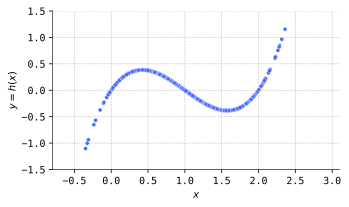

In [1]:
import numpy as np
import scipy as sp
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import math
import matplotlib_inline.backend_inline
import warnings
plt.style.use('../aux-files/custom_style_light.mplstyle')
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
warnings.filterwarnings('ignore')
blue = '#486AFB'
magenta = '#FD46FC'

def h(x):
    return x * (x - 1) * (x - 2)

np.random.seed(42)
x = sp.stats.norm.rvs(loc=1, scale=0.5, size=1000)
y = h(x)

sns.scatterplot(x=x, y=y)
plt.xlabel('$x$')
plt.ylabel('$y=h(x)$')
plt.ylim(-1.5, 1.5)
plt.gcf().set_size_inches(w=5, h=3)
plt.tight_layout()

The plot looks exactly like we would expect: A bunch of points lying on the graph of the function $y=h(x)$. However, very often with real-world data, an *exact* functional dependence $Y = h(X)$ does not truly hold. Instead, the functional relationship is "noisy", resulting in scatter plots that look like this:

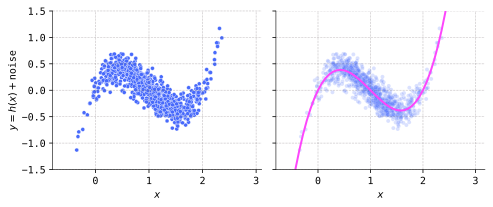

In [2]:
epsilon = sp.stats.norm.rvs(scale=0.15, size=1000)
grid = np.linspace(-0.5, 3)

_, ax = plt.subplots(ncols=2, figsize=(7, 3), sharey=True)

sns.scatterplot(x=x, y=y + epsilon, ax=ax[0])
ax[0].set_ylim(-1.5, 1.5)
ax[0].set_xlabel('$x$')
ax[0].set_ylabel('$y=h(x) + $noise')

sns.scatterplot(x=x, y=y + epsilon, alpha=0.2, ax=ax[1])
ax[1].plot(grid, h(grid), color='#FD46FC')
ax[1].set_xlabel('$x$')

plt.tight_layout()

The "noisy" functional relationship is drawn in the left-hand plot, while on the right-hand plot I have superimposed the graph of the function $y=h(x)$ for reference. Instead of lying directly on the graph of $y=h(x)$, the data is clustered along the graph.

The goal in this chapter is to study "noisy" _linear_ dependencies between random variables; relationships that look like these:

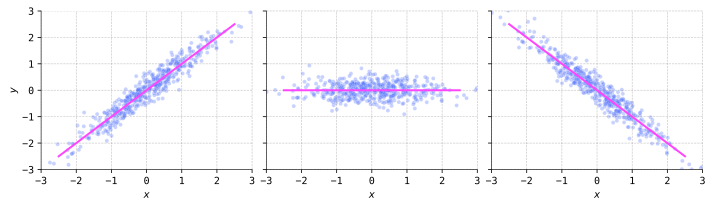

In [3]:
grid = np.linspace(-2.5, 2.5)
epsilon = sp.stats.norm.rvs(scale=0.3, size=500)
m = [1, 0, -1]
x = sp.stats.norm.rvs(size=500)
_, ax = plt.subplots(ncols=3, figsize=(10, 3), sharey=True, sharex=True)

for i, m in enumerate(m):
    y = m * x + epsilon
    sns.scatterplot(x=x, y=y, ax=ax[i], alpha=0.3)
    ax[i].plot(grid, m * grid, color='#FD46FC')
    ax[i].set_xlim(-3, 3)
    ax[i].set_ylim(-3, 3)
    ax[i].set_xlabel('$x$')
    ax[i].set_ylabel('$y$')

plt.tight_layout()

As I mentioned in the introduction, our goal in this section is to uncover ways to _quantify_ or _measure_ the strength of "noisy" linear dependencies between random variables. We will discover that there are two such measures, called _covariance_ and _correlation_.

The definition of _covariance_ is based on the following pair of basic observations:

> Let $(x,y)$ be an observation of a two-dimensional random vector $(X,Y)$
> 1. If the observed values of $(X,Y)$ cluster along a line of _positive_ slope, then $x$ and $y$ tend to be large (small) at the same time.
> 2. If the observed values of $(X,Y)$ cluster along a line of _negative_ slope, then a large (small) value $x$ tends to be paired with a small (large) value $y$.

In order to extract something useful from these observations, it is convenient to _center_ the dataset by subtracting off the means:

$$
X \xrightarrow{\text{replace with}} X - \mu_X \quad \text{and} \quad Y \xrightarrow{\text{replace with}} Y - \mu_Y.
$$

Notice that

$$
E(X - \mu_X) = E(X) - E(\mu_X) = 0,
$$

and similarly $E(Y-\mu_Y) = 0$, so that when we carry out these replacements, we get random variables with mean $0$. Here's an example:

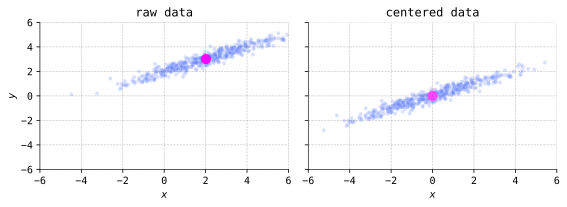

In [4]:
_, axes = plt.subplots(ncols=2, figsize=(8, 3), sharex=True, sharey=True)
np.random.seed(42)
m = 0.5

x = sp.stats.norm.rvs(loc=2, scale=2, size=500)
y = m * x + epsilon + 2
mean = (x.mean(), y.mean())
sns.scatterplot(x=x, y=y, ax=axes[0], alpha=0.2)
axes[0].scatter(mean[0], mean[1], color='magenta', zorder=3, s=100)
axes[0].set_xlim(-6, 6)
axes[0].set_ylim(-6, 6)
axes[0].set_title('raw data')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

sns.scatterplot(x=x - mean[0], y=y - mean[1], ax=axes[1], alpha=0.2)
axes[1].scatter(0, 0, color=magenta, zorder=3, s=100)
axes[1].set_xlim(-6, 6)
axes[1].set_ylim(-6, 6)
axes[1].set_title('centered data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
plt.tight_layout()

You can see that the dataset has not changed its shape---it has only shifted so that its mean (represented by the magenta dot) is at the origin $(0,0)$.

The reason that we center the data is that it allows us to conveniently rephrase our observations above in terms of signs:

> Let $(x,y)$ be an observation of a **centered** two-dimensional random vector $(X,Y)$
> 1. If the observed values of $(X,Y)$ cluster along a line of _positive_ slope, then $x$ and $y$ tend to have the same sign, i.e., $xy>0$.
> 2. If the observed values of $(X,Y)$ cluster along a line of _negative_ slope, then $x$ and $y$ tend to have opposite signs, i.e., $xy<0$.

Essentially, the next definition takes the average value of the product $xy$, as $(x,y)$ ranges over observed pairs of values of a centered random vector $(X,Y)$. If this average value is positive, it suggests a (noisy) linear dependence with positive slope; if it is negative, it suggests a (noisy) linear dependence with negative slope. If the random variables are not centered, then we subtract off their means before computing the product and taking its average value.

```{prf:definition}
:label: covar-def

Let $X$ and $Y$ be two random variables with expectations $\mu_X = E(X)$ and $\mu_Y = E(Y)$. The _covariance_ of $X$ and $Y$, denoted either by $\sigma(X,Y)$ or $\sigma_{XY}$, is defined via the equation

$$
\sigma_{XY} = E \left[ (X-\mu_X)(Y-\mu_Y) \right].
$$
```

Notice that the covariance of a random variable $X$ with itself is exactly its variance:

$$
\sigma_{XX} = E \left[ (X-\mu_X)^2\right] = V(X).
$$

Before we look at an example, it will be convenient to state and prove the following generalization of {prf:ref}`shortcut-var-thm`:

```{prf:theorem} Shortcut Formula for Covariance
:label: shortcut-covar-thm

Let $X$ and $Y$ be two random variables. Then

$$
\sigma_{XY} = E(XY) - E(X) E(Y).
$$
```

```{prf:proof}
The proof is a triviality, given all the properties that we already know about expectations:

\begin{align*}
\sigma_{XY} &= E\left(XY - \mu_Y X - \mu_X Y + \mu_X \mu_Y \right) \\
&= E(XY) - 2\mu_X\mu_Y + \mu_X\mu_Y \\
&= E(XY) - E(X) E(Y).
\end{align*}

```

Armed with this formula, let's do an example problem:

```{admonition} Problem Prompt

Do problem 10 on the worksheet.
```

A pair of very useful properties of covariance are listed in the following:

```{prf:theorem} Covariance = symmetric bilinear form
:label: bilinear-thm

1. _Symmetry_. If $X$ and $Y$ are random variables, then $\sigma_{XY} = \sigma_{YX}$.

2. _Bilinearity_. Let $X_1,\ldots,X_m$ and $Y_1,\ldots,Y_n$ be sequences of random variables, and $a_1,\ldots,a_m$ and $b_1,\ldots,b_n$ sequences of real numbers. Then:
    
    $$
    \sigma\Big( \sum_{i=1}^m a_i X_i, \sum_{j=1}^n b_j Y_j\Big) = \sum_{i=1}^m \sum_{j=1}^n a_i b_j \sigma(X_i,Y_j).
    $$ (bilinear-eqn)

```

I suggest that you attempt to prove this theorem on your own. A special case appears in your [homework](https://github.com/jmyers7/stats-book-materials/blob/main/homework/8-homework.md#problem-8-a-special-case-of-bilinearity) for this chapter.

Bilinearity of covariance allows us to generalize {prf:ref}`var-affine-thm` on the variance of an affine transformation of a random variable:

```{prf:theorem} Variance of a linear combination
:label: variance-lin-combo-thm

Let $X_1,\ldots,X_m$ be a sequence of random variables and $a_1,\ldots,a_m$ a sequence of real numbers. Then:

$$
V(a_1X_1 + \cdots + a_m X_m) = \sum_{i=1}^m a_i^2 V(X_i) + 2\sum_{1 \leq i < j \leq m }a_ia_j \sigma(X_i,X_j).
$$
```

```{prf:proof}
The proof is an application of bilinearity of covariance:

\begin{align*}
V(a_1X_1 + \cdots + a_m X_m) &= \sigma\Big(\sum_{i=1}^m a_i X_i, \sum_{j=1}^m a_j X_j \Big)  \\
&= \sum_{i,j=1}^m a_i a_j \sigma(X_i,X_j) \\
&= \sum_{i=1}^m a_i^2 V(X_i) + 2\sum_{1 \leq i < j \leq m }a_ia_j \sigma(X_i,X_j).
\end{align*}
```

In particular, we see that if $\sigma(X_i,X_j)=0$ for all $i\neq j$ (i.e., if the random variables are pairwise _uncorrelated_; see below), the formula simplifies to:

$$
V(a_1X_1 + \cdots + a_m X_m) = \sum_{i=1}^m a_i^2 V(X_i).
$$

We now turn toward the other measure of linear dependence, called _correlation_. To motivate this latter measure, we note that while the signs of covariances are significant, their precise numerical values may be less so, if we are attempting to use them to measure the strength of a linear dependence. One reason for this is that covariances are sensitive to the scales on which the variables are measured. For an example, consider the following two plots:

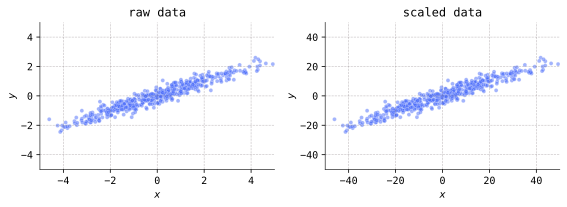

In [5]:
_, axes = plt.subplots(ncols=2, figsize=(8, 3))
np.random.seed(42)
m = 0.5

x = sp.stats.norm.rvs(loc=0, scale=2, size=500)
y = m * x + epsilon
mean = (x.mean(), y.mean())
sns.scatterplot(x=x, y=y, ax=axes[0], alpha=0.5)
axes[0].set_xlim(-5, 5)
axes[0].set_ylim(-5, 5)
axes[0].set_title('raw data')
axes[0].set_xlabel('$x$')
axes[0].set_ylabel('$y$')

sns.scatterplot(x=10 * x, y=10 * y, ax=axes[1], alpha=0.5)
axes[1].set_xlim(-50, 50)
axes[1].set_ylim(-50, 50)
axes[1].set_title('scaled data')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
plt.tight_layout()

The only difference between the two datasets is the axis scales, but the linear relationship between the $x$'s and $y$'s remains the same. In fact, the scales on the axes differ by a factor of $10$, so by {prf:ref}`bilinear-thm`, we have

$$
\sigma(10X, 10Y) = 100 \sigma(X,Y).
$$

Thus, if we use the numerical value of the covariance to indicate the _strength_ of a linear relationship, then we should conclude that the data on right-hand side is _one hundred times_ more "linearly correlated" than the data on the left. But this is nonsense!

The remedy is to define a "normalized" measure of linear dependence:

```{prf:definition}
:label: correlation-def

Let $X$ and $Y$ be two random variables. The _correlation_ of $X$ and $Y$, denoted by either $\rho(X,Y)$ or $\rho_{XY}$, is defined via the equation

$$
\rho_{XY} = \frac{\sigma_{XY}}{\sigma_X \sigma_Y}.
$$
```

The correlation $\rho_{XY}$ is also sometimes called the [Pearson (product-moment) correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), to distinguish it from other types of correlation measures. Its key properties are given in the following:

```{prf:theorem} Properties of correlation
:label: prop-correlation-thm

Let $X$ and $Y$ be random variables.

1. _Symmetry_. We have $\rho_{XY} = \rho_{YX}$.

2. _Scale invariance_. If $a$ is a nonzero real number, then

    $$
    \rho(aX, Y) = \begin{cases}
    \rho(X, Y) & : a>0, \\
    -\rho(X, Y) & : a <0.
    \end{cases}
    $$

3. _Normalization_. We have $|\rho(X,Y)| \leq 1$.
```

```{prf:proof}
The symmetry property of correlation follows from the same property of covariance in {prf:ref}`bilinear-thm`. Scale invariance follows from bilinearity of covariance, as well as the equality $\sigma_{aX} = |a| \sigma_X$ established in {prf:ref}`var-affine-thm` (or its generalization {prf:ref}`variance-lin-combo-thm`). The proof of normalization is a bit more involved but still not very difficult. It requires the Cauchy-Schwarz inequality; see the proof in Section 4.6 of {cite}`DeGrootSchervish2014`, for example. Q.E.D.
```

Remember, covariance and correlation were cooked up to measure linear dependencies between random variables. We wonder, then, what is the correlation between two random variables that are _perfectly_ linearly dependent? Answer:

```{prf:theorem}
:label: linearity-correlation-thm

Let $X$ be a random variable and $a$ and $b$ constants with $a\neq 0$. Then

$$
\rho(X,aX+b) = \begin{cases}
1 & : a>0, \\
-1 & : a < 0.
\end{cases}
$$
```

```{prf:proof}
The proof is a simple computation, similar to the proof of scale invariance from above:

$$
\rho(X,aX+b) = \frac{a\sigma(X,X)+\sigma(X,b)}{\sigma_X\sigma_{aX+b}} = \frac{a V(X)}{\sqrt{V(X)}\sqrt{a^2V(X)}} = \frac{a}{|a|}.
$$
```

We give a name to two random variables whose correlation is zero:

```{prf:definition}
:label: uncorrelated-def

If $X$ and $Y$ are two random variables with $\rho(X,Y)=0$, then we say $X$ and $Y$ are _uncorrelated_. Otherwise, they are said to be _(linearly) correlated_.
```

Let's take a look at an example before continuing:

```{admonition} Problem Prompt

Do problem 11 in the worksheet.
```

You should think of independence as a strong form of non-correlation, and hence correlation is also a strong form of dependence. This is the content of the first part of the following result:

```{prf:theorem} Dependence and correlation
:label: ind-vs-correlation-thm

Let $X$ and $Y$ be random variables.

1. If $X$ and $Y$ are independent, then they are uncorrelated.

2. If $X$ and $Y$ are correlated, then they are dependent.

2. However, there exist dependent $X$ and $Y$ that are uncorrelated.
```

```{prf:proof}
The proof of the first statement is a simple application of {prf:ref}`ind-expect-thm` and the Shortcut Formula for Covariance in {prf:ref}`shortcut-covar-thm`. Indeed, we have

$$
\sigma_{XY} = E(XY) - E(X)E(Y) = E(X)E(Y) - E(X) E(Y) =0,
$$

and then $\rho_{XY} = \sigma_{XY} / (\sigma_X \sigma_Y) = 0$. The second statement is just the contrapositive of the first.

For the second statement, take two continuous random variables $X$ and $Y$ with joint density

$$
f(x,y) = \begin{cases}
\frac{2}{\pi}(x^2+y^2) & : x^2 + y^2 \leq 1, \\
0 & : \text{otherwise}.
\end{cases}
$$

By symmetry, we have $E(X) = E(Y) = E(XY)=0$, and hence $\rho_{XY}=0$ as well. However, $X$ and $Y$ are clearly depenendent since (for example) the support of $f(y|x)$ depends on $x$. Q.E.D.
```

We have only considered a pair $(X,Y)$ of random variables; but what if we have a $d$-dimensional random vector $\bX = (X_1,\ldots,X_d)$? Then we may compute the pairwise covariances $\sigma(X_i,X_j)$ and $\rho(X_i,X_j)$, and we can't resist the urge to put them into matrices:


```{prf:definition}
:label: covar-correl-matrix-def

Let $\bX = (X_1,\ldots,X_d)$ be a $d$-dimensional random vector.

1. We define the _covariance matrix_ of $\bX$ to be the $d\times d$ matrix

    $$
    \bSigma_\bX \def \left[ \sigma_{ij} \right] = \begin{bmatrix}
    \sigma_{11} & \cdots & \sigma_{1d} \\
    \vdots & \ddots & \vdots \\
    \sigma_{d1} & \cdots & \sigma_{dd}
    \end{bmatrix},
    $$

    where $\sigma_{ij} = \sigma(X_i,X_j)$.

2. We define the _correlation matrix_ of $\bX$ to be the $d\times d$ matrix

    $$
    \bP_\bX \def \left[ \rho_{ij} \right] = \begin{bmatrix}
    \rho_{11} & \cdots & \rho_{1d} \\
    \vdots & \ddots & \vdots \\
    \rho_{d1} & \cdots & \rho_{dd}
    \end{bmatrix},
    $$

    where $\rho_{ij} = \rho(X_i,X_j)$.
```

Covariance matrices will prove especially important in the [next section](multivar-norm-sec).

Notice that both the covariance matrix and correlation matrix of a random vector are _symmetric_, meaning $\sigma_{ij} = \sigma_{ji}$ and $\rho_{ij} = \rho_{ji}$ for all $i$ and $j$. But symmetry is not their _only_ special property; in fact, they are both examples of _positive semidefinite_ matrices. These types of matrices will be important over the next few chapters, so let's define them:

```{prf:definition}
:label: first-semidefinite-def

Let $\bA$ be a symmetric matrix of size $d\times d$.

1. If $\bv^\intercal \bA \bv \geq 0$ for all $\bv \in \bbr^d$, then $\bA$ is called _positive semidefinite_. If the only vector for which equality holds is $\bv=\boldsymbol{0}$, then $\bA$ is called _positive definite_.

1. If $\bv^\intercal \bA \bv \leq 0$ for all $\bv \in \bbr^n$, then $\bA$ is called _negative semidefinite_. If the only vector for which equality holds is $\bv=\boldsymbol{0}$, then $\bA$ is called _negative definite_.
```

It will be convenient to have alternate characterizations of definite and semidefinite matrices:

```{prf:theorem}
:label: psd-char-thm

Let $\bA$ be a symmetric matrix of size $d\times d$. Then:

1. The matrix $\bA$ is positive semidefinite (definite) if and only if all its eigenvalues are nonnegative (positive).

2. The matrix $\bA$ is positive semidefinite if and only if there is a positive semidefinite matrix $\bB$ such that $\bA = \bB^2$. Moreover, the matrix $\bB$ is the unique positive semidefinite matrix with this property.
```

The matrix $\bB$ in the second part is, for obvious reasons, called the _square root_ of $\bA$ and is often denoted $\bA^{1/2}$. The proof of this theorem is quite lengthy in comparison to the other proofs in this book. It is not essential reading, so you may safely skip it if you desire to get back quickly to the main thread of the section.

```{prf:proof}
Implicit in both characterizations are the claims that the eigenvalues of $\bA$ are real. To see this, let $\lambda$ be an eigenvalue with eigenvector $\bv$. It is convenient to introduce the [conjugate transpose](https://en.wikipedia.org/wiki/Conjugate_transpose) $(-)^\ast$. Then

$$
\lambda ||\bv||^2 = \lambda \bv^\ast \bv = \bv^\ast \bA \bv = (\bA \bv)^\ast \bv = (\lambda \bv)^\ast \bv = \bar{\lambda}\bv^\ast\bv = \bar{\lambda} ||\bv||^2,
$$

where $\bar{\lambda}$ denotes the complex conjugate of $\lambda$. Note that we used symmetry of $\bA$ in the third equality. Since $\bv$ is not zero, we may divide out the squared norm on the far ends of the sequence of equalities to obtain $\lambda = \bar{\lambda}$. But this shows $\lambda$ is real.

Now, since $\bA$ is symmetric, by the [Spectral Theorem](https://en.wikipedia.org/wiki/Spectral_theorem) (see also Theorem 5.8 in Chapter 7 of {cite}`Artin1991`) there exists an orthogonal matrix $\bQ$ and a diagonal matrix $\bD$ such that

$$
\bA = \bQ \bD \bQ^\intercal.
$$ (diag-eq)

The columns of $\bQ$ are necessarily eigenvectors $\bv_1,\ldots,\bv_d$ of $\bA$ while the main diagonal entries of $\bD$ are the eigenvalues $\lambda_1,\ldots,\lambda_d$, with $\bA \bv_i = \lambda_i \bv_i$ for each $i$. If for each $i=1,\ldots,d$ we write $\bE_i$ for the diagonal matrix with a $1$ in the $(i,i)$-th position and zeros elsewhere, then {eq}`diag-eq` may be rewritten as

$$
\bA = \lambda_1 \bP_1 + \cdots + \lambda_d \bP_d
$$ (spectral-decomp-eq)

where $\bP_i = \bQ \bE_i \bQ^\intercal$. This is the so-called _spectral decomposition_ of $\bA$ into a linear combination of rank-$1$ projection matrices. Note that $\bP_i\bP_j = \boldsymbol{0}$ if $i\neq j$, $\bP_i^2 = \bP_i$ for each $i$, and $\bP_iv_i = v_i$ for each $i$.

The eigenvectors of $\bA$ form an orthonormal basis of $\bbr^d$ since $\bQ$ is orthongal. So, given $\bv\in \bbr^d$, we may write $\bv = b_1 \bv_1 + \cdots + b_d \bv_d$ for some scalars $b_1,\ldots,b_d$. Then, from {eq}`spectral-decomp-eq`, we get

$$
\bv^\intercal\bA\bv = b_1^2 \lambda_1 + \cdots + b_d^2 \lambda_d.
$$

The characterizations in the first statement of the theorem follow immediately.

Turning toward the second statement, suppose that $\bA$ is positive semidefinite. We then define

$$
\bB = \sqrt{\lambda_1} P_1 + \cdots + \sqrt{\lambda_n}P_n.
$$

Notice that the square roots are real, since the eigenvalues are (real) nonnegative. You may easily check that $\bA = \bB^2$, and that $\bB$ is positive semidefinite. I will leave you to prove the converse, that if such a $\bB$ exists, then $\bA$ is necessarily positive semidefinite. We will not address uniqueness of $\bB$ here; for that, see, for example, Theorem 7.2.6 in {cite}`HornJohnson1985`. Q.E.D.
```

We are now ready to prove the main result regarding covariance and correlation matrices:

```{prf:theorem} Covariance and correlation matrices are positive semidefinite
:label: covar-matrix-prop-thm

Let $\bX = (X_1,\ldots,X_d)$ be a $d$-dimensional random vector. Both the covariance matrix $\bSigma_\bX$ and the correlation matrix $\bP_\bX$ are positive semidefinite. They are positive definite if and only if their determinants are nonzero.

```

```{prf:proof}

We will only prove that the correlation matrix $\bP = \bP_\bX$ is positive semidefinite, leaving you to make the easy changes to cover the covariance matrix. First, we have already observed that $\bP$ is symmetric. Then, given $\bv\in \bbr^d$, we use {prf:ref}`bilinear-thm` to compute:

$$
\bv^\intercal \bP \bv = \sum_{i,j=1}^d \frac{v_i}{\sigma_i} \frac{v_j}{\sigma_j} \sigma(X_i,X_j) = \sigma \left(\sum_{i=1}^d \frac{v_i}{\sigma_i}X_i, \sum_{j=1}^d \frac{v_j}{\sigma_j} X_j \right) = V\left( \sum_{j=1}^d \frac{v_j}{\sigma_j} X_j \right) \geq 0.
$$

This establishes that $\bP$ is positive semidefinite. To see that a nonzero determinant is equivalent to positive definiteness, recall that the determinant is the product of the eigenvalues. Then use the characterization of positive definite matrices given in {prf:ref}`psd-char-thm`. Q.E.D.

```










(multivar-norm-sec)=
## Multivariate normal distributions

The goal in this section is simple: Generalize the univariate normal distributions from {numref}`norm-univariate-sec` to higher dimensions. We needed to wait until the current chapter to do this because our generalization will require the machinery of covariance matrices that we developed at the end of the previous section. The ultimate effect will be that the familiar "bell curves" of univariate normal densities will turn into "bell (hyper)surfaces." For example, in two dimensions, the density surface of a bivariate normal random vector might look something like this:

```{image} ../img/multi-var-norm-01.png
:width: 80%
:align: center
```
&nbsp;

The _isoprobability contours_ of this density surface (i.e., curves of constant probability) look like:

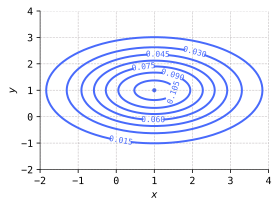

In [6]:
rho = 0.0
sigma1 = math.sqrt(2)
sigma2 = 1
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

resolution = 100
linear_grid = np.linspace(-2, 4, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))
z = norm.pdf(grid)
z = z.reshape(resolution, resolution)

contour = plt.contour(linear_grid, linear_grid, z, colors=blue)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()

Notice that these contours are concentric ellipses centered at the point $(1,1)\in \bbr^2$ with principal axes parallel to the coordinate $x$- and $y$-axes. In higher dimensions, the isoprobability surfaces are so-called _ellipsoids_.

Actually, if we consider only this special case, i.e., when the principal axes of the isoprobability surfaces are parallel with the coordinate axes---we do not need the full strength of the machinery of covariance matrices. Studying this case will also help us gain insight into the general formula for the density of a multivariate normal distribution. So, let's begin with a sequence $X_1,\ldots,X_d$ of _independent_(!) random variables such that $X_i \sim \calN(\mu_i,\sigma_i^2)$ for each $i$. Then independence gives us

$$
f(x_1,\ldots,x_d) = \prod_{i=1}^d \frac{1}{\sqrt{2\pi \sigma_i^2}} \exp \left[ -\frac{1}{2\sigma_i^2} ( x_i-\mu_i)^2\right],
$$ 

or

$$
f(x_1,\ldots,x_d) = \frac{1}{(2\pi)^{d/2} (\sigma_1^2\cdots \sigma_d^2)^{1/2}} \exp \left[- \frac{1}{2} \sum_{i=1}^d \frac{(x_i-\mu_i)^2}{\sigma_i^2} \right].
$$ (init-multi-var-norm-eqn)

As you may easily check by creating your own plots, this formula (in dimension $d=2$) produces "bell surfaces" like the one shown above whose contours are concentric ellipses centered at $(\mu_1,\mu_2)\in \bbr^2$ with their principal axes parallel with the coordinate axes. However, we shall also be interested in creating density surfaces whose isoprobability contours are rotated ellipses, like the following:

```{image} ../img/multi-var-norm-02.png
:width: 80%
:align: center
```
&nbsp;

Indeed, the contours of this surface are given by:

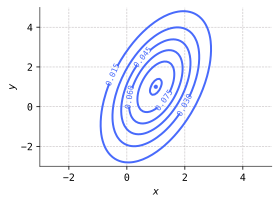

In [7]:
rho = 0.5
sigma1 = 1
sigma2 = 2
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

resolution = 100
linear_grid = np.linspace(-3, 5, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))
z = norm.pdf(grid)
z = z.reshape(resolution, resolution)

contour = plt.contour(x, y, z, colors=blue)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()

The key to uncovering the formula for the density in the general case begins by returning to the formula {eq}`init-multi-var-norm-eqn` and rewriting it using vector and matrix notation. Indeed, notice that if we set

$$
\bx^\intercal = (x_1,\ldots,x_d) \quad \text{and} \quad \bmu^\intercal = (\mu_1,\ldots,\mu_d)
$$

and let $\bSigma$ be the covariance matrix of the $X_i$'s, then we have

$$
f(\bx) = \frac{1}{\det(2\pi\bSigma)^{1/2}} \exp \left[ -\frac{1}{2} (\bx - \bmu)^\intercal \bSigma^{-1}(\bx - \bmu)\right],
$$

where $\det{(2\pi\bSigma)} = (2\pi)^d \det{\bSigma}$. Indeed, by independence, the covariance matrix $\bSigma$ is diagonal, with the variances $\sigma_1^2,\ldots,\sigma_d^2$ along its main diagonal. We get the general formula for the density of a multivariate normal distribution by simply letting the covariance matrix $\bSigma$ be a general positive definite matrix:


```{prf:definition}
:label: multivar-norm-def

Let $\bmu \in \bbr^d$ and let $\bSigma\in \bbr^{d\times d}$ be a positive definite matrix. A continuous $d$-dimensional random vector $\bX$ is said to have a _multivariate normal distribution_ with parameters $\bmu$ and $\bSigma$, denoted

$$
\bX \sim \calN_d(\bmu,\bSigma),
$$

if its probability density function is given by

$$
f(\bx;\bmu,\bSigma) = \frac{1}{\det(2\pi\bSigma)^{1/2}} \exp \left[ -\frac{1}{2} (\bx - \bmu)^\intercal \bSigma^{-1}(\bx - \bmu)\right]
$$ (multivar-norm-eqn)

with support $\bbr^d$. The _standard ($d$-dimensional) multivariate normal distribution_ corresponds to the case that $\bmu^\intercal = \boldsymbol{0}$ and $\bSigma = \mathbf{I}$, where $\boldsymbol{0}$ is the $d$-dimensional zero vector and $\mathbf{I}$ is the $d\times d$ identity matrix.
```

Since $\bSigma$ is positive definite and its determinant is the product of its eigenvalues, we must have $\det(2\pi\bSigma) = (2\pi)^d \det{\bSigma} >0$ by {prf:ref}`psd-char-thm`. Thus, the square root $\det(2\pi\bSigma)^{1/2}$ is real and positive, and the inverse $\bSigma^{-1}$ exists.

To help understand the shape of the density (hyper)surfaces created by {eq}`multivar-norm-eqn`, it helps to ignore the normalizing constant and write

$$
f(\bx;\bmu,\bSigma) \propto \exp \left[ -\frac{1}{2} Q(\bx)\right],
$$ (prop-exp-density-eq)

where $Q(\bx)$ is the (inhomogeneous) degree-$2$ polynomial

$$
Q(\bx) = (\bx - \bmu)^\intercal \bSigma^{-1}(\bx - \bmu).
$$

Note that since $\bSigma$ is positive definite, so too is its inverse $\bSigma^{-1}$ since it is symmetric and has real, positive eigenvalues (can you prove this?). Thus, in the argument to the exponential function in {eq}`prop-exp-density-eq`, we have $-\frac{1}{2}Q(\bmu)=0$, while $-\frac{1}{2}Q(\bx) < 0$ for all other vectors $\bx \in \bbr^d$ different from $\bmu$. But since the exponential function $z\mapsto e^z$ is strictly increasing over the interval $(-\infty,0]$ with a global maximum at $z=0$, we see that the density $f(\bx;\bmu,\bSigma)$ has a global maximum at $\bx = \bmu$.

The isoprobability contours of $f(\bx;\bmu,\bSigma)$ are the sets of solutions $\bx$ to equations of the form

$$
\exp \left[ -\frac{1}{2} Q(\bx)\right] = c,
$$

where $c$ is a constant with $0 < c \leq 1$. Or, equivalently, they are the sets of solutions to equations of the form

$$
Q(\bx) = c^2,
$$ (mahalanobis-sphere-eq)

where now $c$ is any real constant. Suppose that we then define the scalar product

$$
\left\langle \bx, \by \right\rangle_\bSigma = \bx^\intercal \bSigma^{-1}\by, \quad \bx,\by\in \bbr^d.
$$ (inner-prod-eqn)

Since $\bSigma^{-1}$ is positive definite, this is in fact an [inner product](https://en.wikipedia.org/wiki/Inner_product_space) on $\bbr^d$. The associated norm is given by

$$
||\bx||^2_\bSigma = \bx^\intercal \bSigma^{-1} \bx,
$$ (normed-eqn)

and hence the square root $\sqrt{Q(\bx)} = ||\bx - \bmu||_\bSigma$ is the distance from $\bx$ to $\bmu$ in this normed space. This distance is called the [_Mahalanobis distance_](https://en.wikipedia.org/wiki/Mahalanobis_distance), and it then follows that the isoprobability contours defined by {eq}`mahalanobis-sphere-eq` are exactly the "Mahalanobis spheres" of radius $c$. In the case that $d=2$ and

$$
\bu = \begin{bmatrix} 1 \\ 1 \end{bmatrix}, \quad \bSigma = \begin{bmatrix}
1 & 1 \\ 1 & 4
\end{bmatrix},
$$ (multivar-norm-ex-eq)

these "spheres" are ellipses centered at $\bmu$:

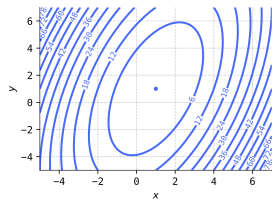

In [8]:
def mahalanobis(x, mean, cov):
    return np.diag((x - mean) @ np.linalg.inv(cov) @ (x - mean).T)

resolution = 100
linear_grid = np.linspace(-5, 7, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))
z = mahalanobis(x=grid, mean=mu, cov=Sigma)
z = z.reshape(resolution, resolution)

contour = plt.contour(x, y, z, colors=blue, levels=15)
plt.clabel(contour, inline=True, fontsize=8)
plt.scatter(1, 1)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=4, h=3)
plt.tight_layout()

Let's collect our observations in the following theorem, along with a few additional facts:

```{prf:theorem} Isoprobability contours of normal vectors
:label: prop-multivar-norm-thm

Suppose that $\bX \sim \calN_d(\bmu,\bSigma)$, where $\bSigma$ is a positive definite matrix with real, positive eigenvalues $\lambda_1,\ldots,\lambda_d$. Define $Q(\bx) = (\bx - \bmu)^\intercal \bSigma^{-1}(\bx - \bmu)$ for all $\bx \in \bbr^d$.

1. The isoprobability contours of the density function $f(\bx;\bmu,\bSigma)$ are concentric ellipsoids centered at $\bmu$ defined by equations

    $$
    Q(\bx) = c^2
    $$ (mahalanobis-sphere-02-eq)

    for fixed $c\in \bbr$.

2. For $c\neq 0$, the principal axes of the ellipsoid defined by {eq}`mahalanobis-sphere-02-eq` point along the eigenvectors of the matrix $\bSigma$. The half-lengths of the principal axes are given by $|c|\sqrt{\lambda_i}$.

3. In particular, if $\bSigma$ is a (positive) multiple of the identity matrix, then the isoprobability contours are concentric spheres centered at $\bmu$.
```
We have already proved the first statement; for the second, see Section 4.4 in {cite}`HardleSimar2019`, for example.

It will be useful to generalize a pair of important univariate results from {numref}`norm-univariate-sec` to the case of multivariate normal distributions. The first result is a generalization of {prf:ref}`affine-gaussian-thm` that states (invertible) affine transformations of normal random variables are still normal. The same is true for normal random vectors:

```{prf:theorem} Affine transformations of normal vectors
:label: affine-trans-mutivar-norm-thm

Let $\bX \sim \calN_d(\bmu,\bSigma)$, let $\bA\in \bbr^{d\times d}$ be nonsingular matrix, and let $\bb \in \bbr^d$. Then $\bY = \bA \bX + \bb$ is a normal random vector with $\bmu_\bY = \bA\bmu + \bb$ and $\bSigma_\bY = \bA\bSigma\bA^\intercal$.
```

```{prf:proof}

The proof goes through {prf:ref}`multivar-density-trans-thm`. In the language and notation of that theorem, we have $r(\bx) = \bA \bx + \bb$, and so $s(\by) = \bA^{-1}(\by - \bb)$. It is easy to show that

$$
\frac{\partial(s_1,\ldots,s_d)}{\partial(y_1,\ldots,y_d)}(\by) = \bA^{-1},
$$

and so

$$
f_\bY(\by) = \frac{1}{|\det{\bA}|} f_\bX(\bA^{-1}(\by - \bb)) 
$$

for all $\by \in \bbr^d$. But then we compute

\begin{align*}
f_\bY(\by) &= \frac{1}{\det(2\pi \bA\bSigma\bA^\intercal)^{1/2}} \exp \left[ -\frac{1}{2}\left(\bA^{-1}\by - \bA^{-1}\bb - \bmu \right)^\intercal \bSigma^{-1}\left(\bA^{-1}\by - \bA^{-1}\bb - \bmu \right) \right] \\
&= \frac{1}{\det(2\pi \bA\bSigma\bA^\intercal)^{1/2}} \exp \left[ -\frac{1}{2}\left(\by - \bb - \bA\bmu \right)^\intercal (\bA \bSigma\bA^\intercal)^{-1} \left(\by - \bb - \bA\bmu \right) \right],
\end{align*}

where we recognize the expression on the second line as the density of an $\calN_d(\bA\bmu+\bb, \bA\bSigma\bA^\intercal)$ random vector. Q.E.D.
```

The second result is a generalization of {prf:ref}`standardization-cor`, which states that we may perform an invertible affine transformation of a normal random variable to obtain a standard normal one. Again, the same is true for normal random vectors. To state this generalized result formally, we require the concept of the _square root_ of a positive definite matrix that we introduced in {prf:ref}`psd-char-thm`.


```{prf:corollary} Standardization of normal vectors
:label: standardize-multivar-cor

If $\bX \sim \calN_d(\bmu,\bSigma)$, then $\bZ = \bSigma^{-1/2}(\bX - \bmu)$ has a ($d$-dimensional) standard normal distribution.
```

The affine transformation $\bZ = \bSigma^{-1/2}(\bx - \bmu)$ in the corollary is sometimes called a _Mahalanobis transformation_. We may use these transformations to help us determine the distributions of the components of a normal random vector:

```{prf:theorem} Components of normal vectors
:label: components-multivar-norm-thm

Let $\bX \sim \calN_d(\bmu,\bSigma)$ and $\bX = (X_1,\ldots,X_d)$, where

$$
\bmu^\intercal = (\mu_1,\ldots,\mu_d) \quad \text{and} \quad \bSigma = \left[ \sigma_{ij} \right].
$$

Then each component random variable $X_i$ is normal with mean $\mu_i$ and variance $\sigma_{ii}$.
```

```{prf:proof}
By {prf:ref}`standardize-multivar-cor`, the random vector $\bZ = \bSigma^{-1/2}(\bX - \bmu)$ is a $d$-dimensional standard normal vector. It is not difficult to show that the components of $\bZ$ are all standard normal variables:

$$
Z_1,\ldots,Z_d\sim \calN(0,1).
$$ (z-comp-norm-eq)

But $\bX = \bSigma^{1/2} \bZ + \bmu$, and so

$$
X_i = \sum_{j=1}^d \omega_{ij} Z_j + \mu_i
$$

where $\bSigma^{1/2} = [\omega_{ij}]$. Now apply {prf:ref}`mgf-norm-thm` and use {eq}`z-comp-norm-eq` to conclude that

$$
X_i \sim \calN\left(\mu_i, \sum_{j=1}^d \omega_{ij}^2 \right).
$$

However, we have

$$
\sum_{j=1}^d \omega_{ij}^2 = \sum_{j=1}^d \omega_{ij}\omega_{ji} = \sigma_{ii}
$$

since $\bSigma^{1/2} \bSigma^{1/2} = \bSigma$ and $\bSigma^{1/2}$ is symmetric. Q.E.D.
```

In fact, an even stronger result than {prf:ref}`components-multivar-norm-thm` is true: Not only are the individual univariate components of a normal random vector themselves normal, but _any_ linear combination of these components is also normal. Even more surprising, this fact turns out to give a complete characterization of normal random vectors! This is the content of:

```{prf:theorem} The Linear-Combination Criterion for Normal Random Vectors
:label: char-normal-thm

Let $\bX = (X_1,\ldots,X_d)$ be a $d$-dimensional random vector. Then $\bX$ is a normal random vector with parameters $\bmu$ and $\bSigma$ if and only if every linear combination

$$
a_1 X_1 + \cdots + a_d X_d, \quad a_1,\ldots,a_d \in \bbr
$$

is a normal random variable. In this case, the parameter $\bSigma$ is the covariance matrix of $\bX$, while $\bmu^\intercal = (\mu_1,\ldots,\mu_d)$ with $E(X_i) = \mu_i$ for each $i$.
```

We will not prove this, since the clearest proof (that I know of) makes use of _characteristic functions_. (See, for example, Chapter 5 in {cite}`Gut2009`.)

At least in two dimensions, using the fact that the parameter $\bSigma$ in $(X,Y) \sim \calN(\bmu,\bSigma)$ is the covariance matrix of $(X,Y)$ gives us an easy method to cook up examples of bivariate normal distributions of a specified shape. Indeed, by the theorem, we must have

$$
\bSigma = \begin{bmatrix}
\sigma_X^2 & \sigma_{XY} \\ \sigma_{XY} & \sigma_Y^2
\end{bmatrix} = \begin{bmatrix}
\sigma_X^2 & \rho \sigma_X \sigma_Y \\ \rho\sigma_X \sigma_Y & \sigma_Y^2
\end{bmatrix}
$$

```{margin}

What goes wrong in the case that $\rho=\pm 1$?
```

where $\rho = \rho_{XY}$. One then first selects the correlation $\rho$ of the random variables $X$ and $Y$ such that $|\rho|<1$ (note the _strict_ inequality!), which rotates the principal axes of the elliptical isoprobability contours; a value of $\rho=0$ will create principal axes parallel to the $x$- and $y$-axes. Then, by choosing the standard deviations $\sigma_X$ and $\sigma_Y$, we can alter the widths of the projections of these ellipses onto the $x$- and $y$-axes. For example, the following shows the isoprobability contours for four different selections of the parameters $(\rho,\sigma_X,\sigma_Y)$ where $\bmu^\intercal = (1,1)$:

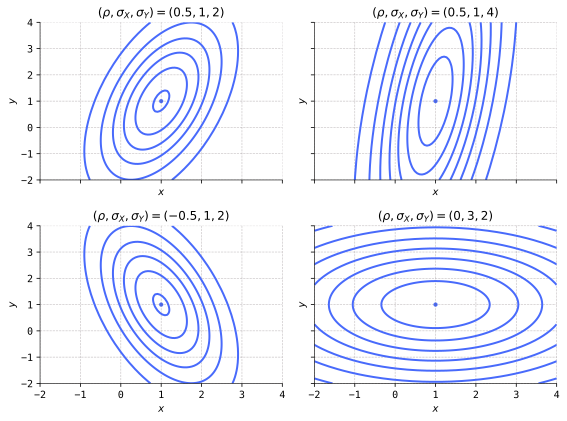

In [9]:
def covar_matrix(rho, sigma1, sigma2):
    return np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])

parameters = [[0.5, 1, 2], [0.5, 1, 4], [-0.5, 1, 2], [0, 3, 2]]   # rho, sigma1, sigma2

resolution = 100
linear_grid = np.linspace(-2, 4, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))

_, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 6), sharex=True, sharey=True)

for parameter, axis in zip(parameters, axes.flatten()):
    Sigma = covar_matrix(*parameter)
    rho, sigma1, sigma2 = parameter
    norm = sp.stats.multivariate_normal(mean=np.array([1, 1]), cov=Sigma)

    z = norm.pdf(grid)
    z = z.reshape(resolution, resolution)
    axis.contour(x, y, z, colors=blue)
    axis.scatter(1, 1)
    axis.set_xlabel('$x$')
    axis.set_ylabel('$y$')
    axis.set_title(f'$(\\rho,\\sigma_X,\\sigma_Y)=({rho},{sigma1},{sigma2})$')
    
plt.tight_layout()
    

In the [programming assignment](https://github.com/jmyers7/stats-book-materials/tree/main/programming-assignments) for this chapter, you will actually implement this procedure. For example, I used these methods to simulate $1{,}000$ random draws from a bivariate normal distribution with positively correlated components and which is taller than it is wide. If I plot these simulated data over top of isoprobability contours, I get this:

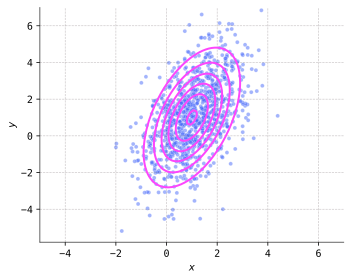

In [10]:
rho = 0.5
sigma1 = 1
sigma2 = 2
Sigma = np.array([[sigma1 ** 2, rho * sigma1 * sigma2], [rho * sigma1 * sigma2, sigma2 ** 2]])
mu = np.array([1, 1])
norm = sp.stats.multivariate_normal(mean=mu, cov=Sigma)

np.random.seed(42)
sample = norm.rvs(size=1000)

resolution = 100
linear_grid = np.linspace(-5, 7, resolution)
x, y = np.meshgrid(linear_grid, linear_grid)
grid = np.column_stack((x.reshape(-1, 1), y.reshape(-1, 1)))
z = norm.pdf(grid)
z = z.reshape(resolution, resolution)

sns.scatterplot(x=sample[:, 0], y=sample[:, 1], alpha=0.5)
plt.contour(x, y, z, colors=magenta)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gcf().set_size_inches(w=5, h=4)
plt.tight_layout()

Let's finish off this long chapter with an example problem:

```{admonition} Problem Prompt

Do problem 12 on the worksheet.
```